# Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('ggplot')

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


## Is song popularity correlated with the song title's positivity?
## Have song titles become more negative over time?

In [2]:
songs = pd.read_csv('data/spotify_songs.csv')

In [3]:
songs['track_name'].values[0]

"I Don't Care (with Justin Bieber) - Loud Luxury Remix"

In [4]:
songs.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


# EDA


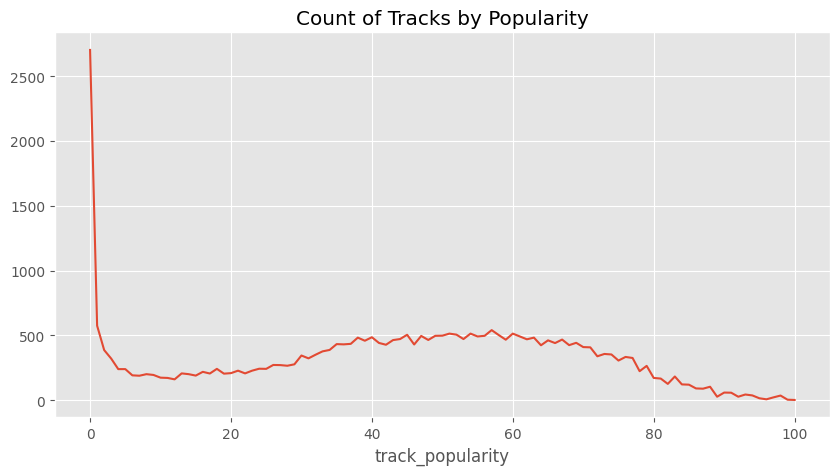

In [5]:
songs['track_popularity'].value_counts().sort_index().plot(kind='line', title='Count of Tracks by Popularity', figsize=(10,5));

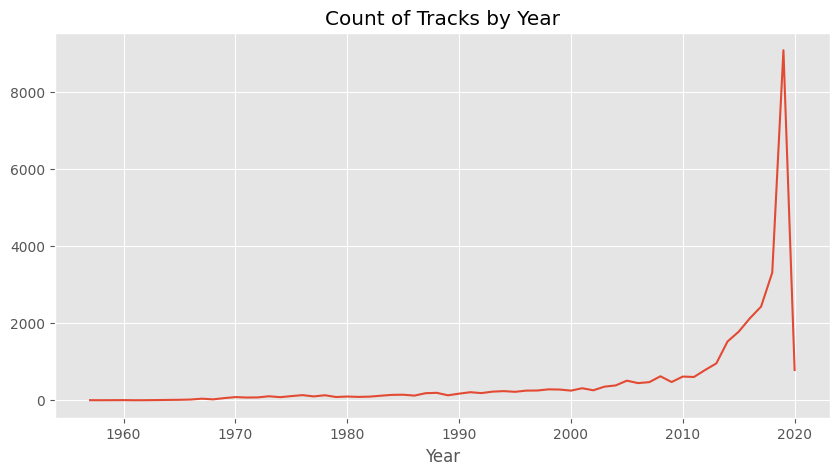

In [6]:
songs_with_year = songs.assign(Year = songs.get('track_album_release_date').str[:4].apply(int))
songs_with_year['Year'].value_counts().sort_index().plot(kind='line', title='Count of Tracks by Year', figsize=(10,5));

# VADER Sentiment Scoring

In [7]:
sia = SentimentIntensityAnalyzer()

In [8]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [9]:
# Making sure all track names are string
songs['track_name'] = songs['track_name'].apply(str)

In [10]:
res = {}
for i, row in tqdm(songs.iterrows(), total=len(songs)):
    text = row['track_name']
    myid = row['track_id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/32833 [00:00<?, ?it/s]

In [11]:
songs_vaders = pd.DataFrame(res).T
songs_vaders = songs_vaders.reset_index().rename(columns={'index': 'track_id'})
songs_vaders
songs_vaders = songs_vaders.merge(songs_with_year, how="left")

In [12]:
songs_vaders

,track_id,neg,neu,pos,compound,track_name,track_artist,track_popularity,track_album_id,track_album_name,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Year
0,6f807x0ima9a1j3VPbc7VN,0.273,0.727,0.000,-0.3875,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,...,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019
1,6f807x0ima9a1j3VPbc7VN,0.273,0.727,0.000,-0.3875,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,...,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019
2,0r7CVbZTWZgbTCYdfa2P31,0.000,1.000,0.000,0.0000,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),...,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019
3,0r7CVbZTWZgbTCYdfa2P31,0.000,1.000,0.000,0.0000,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),...,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019
4,1z1Hg7Vb0AhHDiEmnDE79l,0.000,1.000,0.000,0.0000,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),...,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,0.000,1.000,0.000,0.0000,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),...,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014
32829,5Aevni09Em4575077nkWHz,0.000,1.000,0.000,0.0000,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,...,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013
32830,7ImMqPP3Q1yfUHvsdn7wEo,0.000,0.500,0.500,0.4588,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),...,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014
32831,2m69mhnfQ1Oq6lGtXuYhgX,0.000,1.000,0.000,0.0000,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),...,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014


In [13]:
songs_vaders

,track_id,neg,neu,pos,compound,track_name,track_artist,track_popularity,track_album_id,track_album_name,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Year
0,6f807x0ima9a1j3VPbc7VN,0.273,0.727,0.000,-0.3875,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,...,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019
1,6f807x0ima9a1j3VPbc7VN,0.273,0.727,0.000,-0.3875,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,...,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019
2,0r7CVbZTWZgbTCYdfa2P31,0.000,1.000,0.000,0.0000,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),...,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019
3,0r7CVbZTWZgbTCYdfa2P31,0.000,1.000,0.000,0.0000,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),...,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019
4,1z1Hg7Vb0AhHDiEmnDE79l,0.000,1.000,0.000,0.0000,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),...,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,0.000,1.000,0.000,0.0000,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),...,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014
32829,5Aevni09Em4575077nkWHz,0.000,1.000,0.000,0.0000,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,...,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013
32830,7ImMqPP3Q1yfUHvsdn7wEo,0.000,0.500,0.500,0.4588,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),...,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014
32831,2m69mhnfQ1Oq6lGtXuYhgX,0.000,1.000,0.000,0.0000,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),...,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014


In [14]:
songs_vaders[['Year', 'compound']].groupby('Year').agg('mean')

,compound
Year,
1957,-0.180600
1958,0.000000
1960,0.142975
1961,0.000000
1962,0.000000
...,...
2016,0.031396
2017,0.030242
2018,0.028051


In [26]:
songs_by_year = songs_vaders[['Year', 'compound']].groupby('Year').agg('mean')

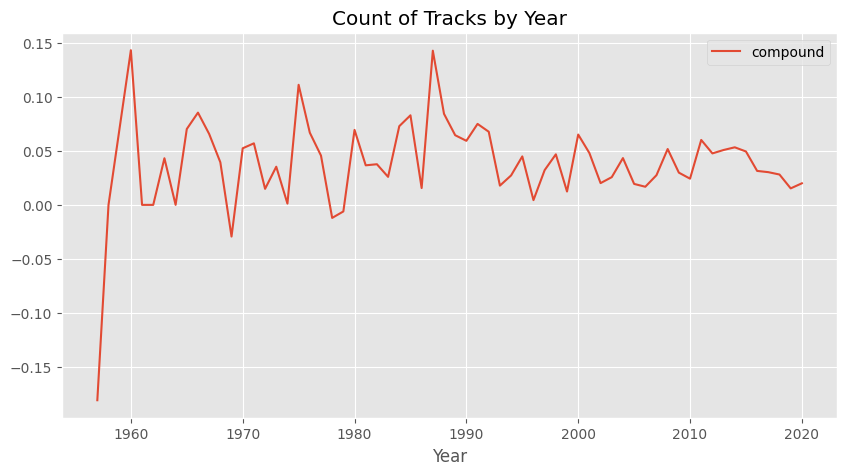

In [28]:
songs_by_year.plot(kind='line', title='Count of Tracks by Year', figsize=(10,5));

In [29]:
# Realizing there may not be much data for certain years
songs_vaders[songs_vaders.get('Year') == 1959]

,track_id,neg,neu,pos,compound,track_name,track_artist,track_popularity,track_album_id,track_album_name,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Year


In [20]:
songs_vaders[(songs_vaders.groupby('Year').count() > 10)]

,track_id,neg,neu,pos,compound,track_name,track_artist,track_popularity,track_album_id,track_album_name,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
count_by_year = songs_vaders.groupby('Year').count()
filtered_means = songs_by_year[count_by_year > 10]
filtered_means

,compound
Year,
1957,NaN
1958,NaN
1960,NaN
1961,NaN
1962,NaN
...,...
2016,0.031396
2017,0.030242
2018,0.028051


In [33]:
filtered_means_clean = filtered_means.dropna(subset=['compound'])
filtered_means_clean

,compound
Year,
1965,0.070133
1966,0.085279
1967,0.065566
1968,0.039361
1969,-0.029280
1970,0.052316
1971,0.056900
1972,0.014820
1973,0.035274


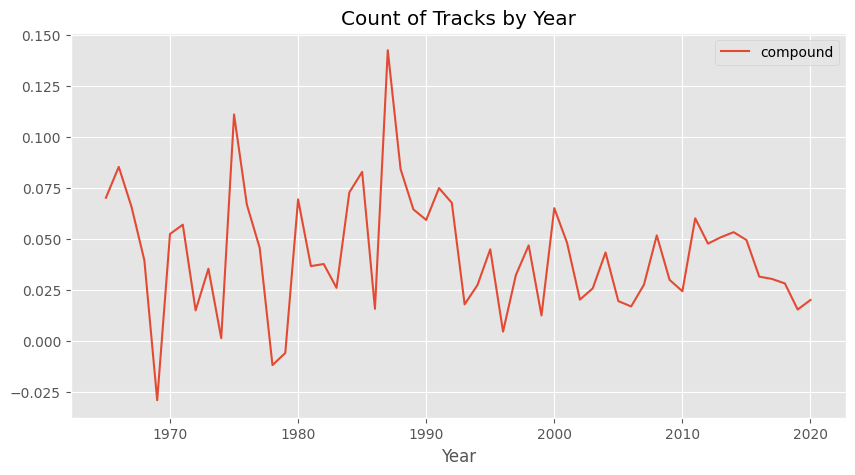

In [34]:
filtered_means_clean.plot(kind='line', title='Count of Tracks by Year', figsize=(10,5));

# Conclusion

After visualizing results of the data post sentiment analysis, there does not appear to be a clear trend in positivity or negativity throughouth the years. There are spikes in the data showing certain years may have had upticks in number of negative or positive songs but overall the changes do not persist over several years. The data does show that titles tend to be more positive than negative overall and especially in recent years.